In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"A:\my_codes\my_project\Machine Learning\Supervised Machine Learning\Regression\ElasticNet  Regression\Steel Industry Energy Consumption Prediction\Steel_industry_data.csv.zip",encoding='unicode_escape')
df

,ï»¿date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [3]:
df.columns

Index(['ï»¿date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='str')

In [4]:
df.drop(['WeekStatus', 'Day_of_week', 'Load_Type'], axis=1, inplace=True)
df

,ï»¿date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500
...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500


In [5]:
X= df[[ 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor','NSM']]
Y= df[['Usage_kWh']]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
elasticnet_cv = ElasticNetCV(alphas=np.logspace(-3, 3, 50), cv=5, max_iter=10000)
elasticnet_cv.fit(X_train.fillna(X_train.median()), Y_train)
best_alpha = elasticnet_cv.alpha_
print("Best alpha:", best_alpha)

a:\my_codes\my_project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha: 0.001


In [8]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('elasticnet', ElasticNet(alpha=best_alpha))
])

In [9]:
X_train

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
9284,0.00,21.78,0.00,100.00,18.85,62100
14314,4.93,0.00,0.00,50.96,100.00,9900
5094,7.34,0.00,0.00,65.95,100.00,6300
33269,22.28,0.00,0.03,93.12,100.00,48600
9994,3.82,0.00,0.00,63.01,100.00,9900
...,...,...,...,...,...,...
16850,0.00,25.27,0.00,100.00,22.22,45900
6265,4.57,0.00,0.00,63.03,100.00,23400
11284,0.14,14.33,0.01,99.99,68.76,47700
860,4.32,0.00,0.00,73.19,100.00,83700


In [10]:
Y_train

,Usage_kWh
9284,4.18
14314,2.92
5094,6.44
33269,56.92
9994,3.10
...,...
16850,5.76
6265,3.71
11284,13.57
860,4.64


In [11]:
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
Y_pred

a:\my_codes\my_project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.940e+04, tolerance: 3.122e+03
  model = cd_fast.enet_coordinate_descent(


array([  1.88800104,  58.63290371, 123.35815101, ..., 147.9746113 ,
         5.50174575,  36.90101907], shape=(7008,))

In [12]:
X_test

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
11356,3.82,0.00,0.00,60.20,100.00,26100
26543,48.02,0.00,0.03,78.46,100.00,43200
2445,59.65,0.00,0.06,89.61,100.00,41400
14649,0.00,16.60,0.00,100.00,18.53,52200
32699,20.99,0.00,0.03,94.19,100.00,54000
...,...,...,...,...,...,...
9044,3.85,0.00,0.00,63.56,100.00,18900
15276,5.54,0.00,0.00,46.63,100.00,11700
3023,81.94,0.00,0.07,87.13,100.00,43200
32096,2.59,0.14,0.00,82.00,99.93,29700


In [13]:
Y_test

,Usage_kWh
11356,2.88
26543,60.77
2445,120.42
14649,3.13
32699,58.86
...,...
9044,3.17
15276,2.92
3023,145.51
32096,3.71


In [14]:
accuracy = r2_score(Y_test,Y_pred)
print("Accuracy (R²):", accuracy)

Accuracy (R²): 0.996114366399879


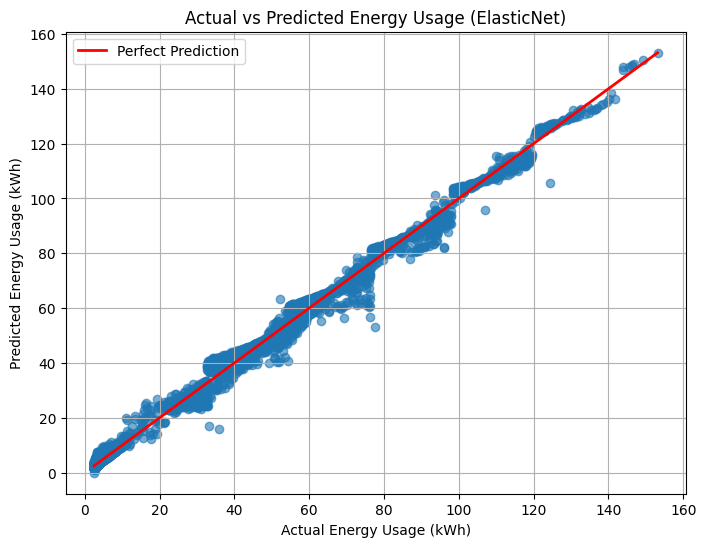

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    color='red',
    linewidth=2,
    label='Perfect Prediction'
)
plt.xlabel("Actual Energy Usage (kWh)")
plt.ylabel("Predicted Energy Usage (kWh)")
plt.title("Actual vs Predicted Energy Usage (ElasticNet)")
plt.legend()
plt.grid(True)
plt.show()